In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Data Source:https://www.kaggle.com/datasets/sarahquesnelle/canada-data
Temperature_DF = pd.read_csv("Resources/Canada_Temperature_Data.csv")

Temperature_DF2 = Temperature_DF.loc[(Temperature_DF["Year"] >= 1989) & (Temperature_DF["Year"] <= 2020), :]

Prov_DF = Temperature_DF2.loc[Temperature_DF2["Prov"].isin(["ON", "AB", "QC"]), :]

Canada_Temperature_DF = Prov_DF.drop("Stn_Name", axis=1)

Canada_Temperature_DF


# define the conditions for each season
conditions = [
    (Canada_Temperature_DF['Month'].isin([12, 1, 2])),
    (Canada_Temperature_DF['Month'].isin([3, 4, 5])),
    (Canada_Temperature_DF['Month'].isin([6, 7, 8])),
    (Canada_Temperature_DF['Month'].isin([9, 10, 11]))
]

# define the corresponding values for each season
values = ['Winter', 'Spring', 'Summer', 'Fall']

# create a new column 'Season' based on the conditions and values
Canada_Temperature_DF['Seasons'] = np.select(conditions, values)




Canada_Temperature_DF.rename(columns={'Prov': 'Province','Tm': 'Average Temperature', 'S': 'Average Snowfall Recorded', 'P': 'Average Precipitation Recorded'}, inplace=True)



Canada_Temperature_DF['Average Temperature'] = Canada_Temperature_DF['Average Temperature'].astype(float)
Canada_Temperature_DF['Average Snowfall Recorded'] = Canada_Temperature_DF['Average Snowfall Recorded'].astype(float)
Canada_Temperature_DF['Average Precipitation Recorded'] = Canada_Temperature_DF['Average Precipitation Recorded'].astype(float)


Canada_Temperature_DF

,Year,Month,Province,Average Temperature,Average Snowfall Recorded,Average Precipitation Recorded,Seasons
941030,1989,1,AB,-10.4,27.0,35.5,Winter
941031,1989,1,AB,-11.1,24.0,28.0,Winter
941032,1989,1,AB,-12.8,37.5,43.5,Winter
941033,1989,1,AB,-9.1,36.0,54.0,Winter
941034,1989,1,AB,-12.9,20.2,23.2,Winter
...,...,...,...,...,...,...,...
1357243,2017,9,QC,13.5,0.0,62.4,Fall
1357244,2017,9,QC,14.5,0.0,83.8,Fall
1357245,2017,9,QC,14.1,0.0,52.2,Fall
1357246,2017,9,QC,9.3,0.0,76.4,Fall


In [4]:
# group by year, season, and province
grouped = Canada_Temperature_DF.groupby(['Year', 'Seasons', 'Province'])

# calculate summary statistics
summary_stats = grouped.agg({'Average Temperature': ['mean', 'median', 'std', 'var', 'sem'],
                             'Average Snowfall Recorded': ['mean', 'median', 'std', 'var', 'sem'],
                             'Average Precipitation Recorded': ['mean', 'median', 'std', 'var', 'sem']})

# flatten multi-level column names
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# reset index
summary_stats = summary_stats.reset_index()


Prov_ON = summary_stats.loc[summary_stats["Province"].isin(["ON"]), :]
Prov_AB = summary_stats.loc[summary_stats["Province"].isin(["AB"]), :]
Prov_QC = summary_stats.loc[summary_stats["Province"].isin(["QC"]), :]

# print summary statistics by year, season, and province
print(Prov_AB)



     Year Seasons Province  Average Temperature_mean  \
0    1989    Fall       AB                  4.543175   
3    1989  Spring       AB                  3.222601   
6    1989  Summer       AB                 15.048938   
9    1989  Winter       AB                -10.994872   
12   1990    Fall       AB                  4.170015   
..    ...     ...      ...                       ...   
333  2016  Winter       AB                 -7.712791   
336  2017    Fall       AB                  2.961905   
339  2017  Spring       AB                  3.525373   
342  2017  Summer       AB                 16.726984   
345  2017  Winter       AB                 -8.559091   

     Average Temperature_median  Average Temperature_std  \
0                          5.05                 5.929142   
3                          5.25                 7.314569   
6                         15.20                 2.449415   
9                        -11.10                 4.073731   
12                         

In [5]:
# save summary_stats to Excel file
summary_stats.to_excel('summary_stats.xlsx', index=False)

In [6]:
provices_result = pd.read_csv("Resources/Economic_Sector_Prov.csv")
provices_result.head()

,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt


In [37]:
Gas_df = provices_result.loc[provices_result["Source"].isin(["Oil and Gas"]), :]
Gas_df

,Year,Region,Index,Source,CO2eq,Unit
1,1990,Alberta,1,Oil and Gas,61.96,Mt
11,1990,British Columbia,11,Oil and Gas,7.87,Mt
21,1990,Canada,21,Oil and Gas,102.65,Mt
31,1990,Manitoba,31,Oil and Gas,1.54,Mt
40,1990,New Brunswick,40,Oil and Gas,1.22,Mt
...,...,...,...,...,...,...
3885,2020,Ontario,3885,Oil and Gas,7.19,Mt
3894,2020,Prince Edward Island,3894,Oil and Gas,0,Mt
3903,2020,Quebec,3903,Oil and Gas,2.27,Mt
3912,2020,Saskatchewan,3912,Oil and Gas,17.32,Mt


In [38]:
Gas_df.reset_index(inplace=True)
Gas_df.drop('Index', axis=1, inplace=True)

Gas_df





C:\Users\Fabio_UofT SCS\AppData\Local\Temp\ipykernel_2208\2666434117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gas_df.drop('Index', axis=1, inplace=True)


,index,Year,Region,Source,CO2eq,Unit
0,1,1990,Alberta,Oil and Gas,61.96,Mt
1,11,1990,British Columbia,Oil and Gas,7.87,Mt
2,21,1990,Canada,Oil and Gas,102.65,Mt
3,31,1990,Manitoba,Oil and Gas,1.54,Mt
4,40,1990,New Brunswick,Oil and Gas,1.22,Mt
...,...,...,...,...,...,...
398,3885,2020,Ontario,Oil and Gas,7.19,Mt
399,3894,2020,Prince Edward Island,Oil and Gas,0,Mt
400,3903,2020,Quebec,Oil and Gas,2.27,Mt
401,3912,2020,Saskatchewan,Oil and Gas,17.32,Mt


In [13]:
#Locate all data frames for wintr and summer 
all_winters = Canada_Temperature_DF.loc[Canada_Temperature_DF["Seasons"] == "Winter"]
all_summers = Canada_Temperature_DF.loc[Canada_Temperature_DF["Seasons"] == "Summer"]
    
all_summers

,Year,Month,Province,Average Temperature,Average Snowfall Recorded,Average Precipitation Recorded,Seasons
956546,1989,6,AB,15.4,0.0,88.2,Summer
956547,1989,6,AB,14.9,0.0,91.2,Summer
956548,1989,6,AB,12.8,0.0,117.5,Summer
956549,1989,6,AB,9.1,28.4,122.0,Summer
956550,1989,6,AB,13.8,0.0,101.3,Summer
...,...,...,...,...,...,...,...
1356932,2017,8,QC,15.8,0.0,91.6,Summer
1356933,2017,8,QC,14.1,0.0,108.6,Summer
1356934,2017,8,QC,12.2,0.0,70.8,Summer
1356935,2017,8,QC,13.4,0.0,112.9,Summer


In [15]:
#find the coldest winter and hottest summer
Coldest_winter = all_winters['Average Temperature'].min()
Hottest_summer = all_summers['Average Temperature'].max()
print(Coldest_winter,Hottest_summer)

-32.8 26.4


In [18]:
#find the province that had the coldest winter and the hottest summer
Coldest_province = all_winters.loc[all_winters['Average Temperature'] == Coldest_winter]
Hottest_province = all_summers.loc[all_summers['Average Temperature'] == Hottest_summer]
Hottest_province

,Year,Month,Province,Average Temperature,Average Snowfall Recorded,Average Precipitation Recorded,Seasons
1318468,2011,7,ON,26.4,0.0,75.8,Summer


In [20]:
AB_winter_group = Prov_AB.loc[Prov_AB["Seasons"] == "Winter"]
AB_winter_group

,Year,Seasons,Province,Average Temperature_mean,Average Temperature_median,Average Temperature_std,Average Temperature_var,Average Temperature_sem,Average Snowfall Recorded_mean,Average Snowfall Recorded_median,Average Snowfall Recorded_std,Average Snowfall Recorded_var,Average Snowfall Recorded_sem,Average Precipitation Recorded_mean,Average Precipitation Recorded_median,Average Precipitation Recorded_std,Average Precipitation Recorded_var,Average Precipitation Recorded_sem
9,1989,Winter,AB,-10.994872,-11.10,4.073731,16.595282,0.168428,25.420513,21.30,19.843244,393.754339,0.820417,26.044615,22.00,19.599674,384.147236,0.810347
21,1990,Winter,AB,-11.153076,-10.80,4.103811,16.841263,0.172041,23.062039,19.00,17.482049,305.622042,0.732886,22.200879,18.50,16.598015,275.494101,0.695825
33,1991,Winter,AB,-6.880322,-7.30,5.375676,28.897892,0.227367,16.667084,13.00,13.950599,194.619201,0.590047,17.173703,13.30,14.604556,213.293053,0.617707
45,1992,Winter,AB,-8.536612,-8.10,5.531185,30.594004,0.236065,21.864481,20.20,15.335974,235.192112,0.654523,21.420219,20.00,14.518192,210.777893,0.619621
57,1993,Winter,AB,-9.777698,-9.60,4.469364,19.975213,0.189543,13.885072,11.00,11.756026,138.204155,0.498567,13.657914,11.00,11.721418,137.391631,0.497099
69,1994,Winter,AB,-13.942243,-14.60,5.205681,27.099111,0.225061,33.620561,23.50,27.750310,770.079726,1.199751,32.771963,22.60,27.447303,753.354456,1.186650
81,1995,Winter,AB,-11.262524,-11.50,4.107205,16.869129,0.179596,14.306310,11.20,12.020030,144.481129,0.525599,15.076864,12.00,13.331210,177.721169,0.582933
93,1996,Winter,AB,-15.169531,-15.90,5.588226,31.228267,0.246967,23.131836,20.90,16.745148,280.399983,0.740038,23.345898,20.90,17.179054,295.119905,0.759214
105,1997,Winter,AB,-8.435249,-6.50,6.050474,36.608237,0.264822,14.590230,10.95,16.737754,280.152400,0.732592,14.839847,11.05,16.794467,282.054110,0.735074
117,1998,Winter,AB,-10.610749,-10.60,5.564026,30.958384,0.243764,18.840499,16.00,21.223961,450.456530,0.929839,18.884069,15.60,21.444721,459.876073,0.939510


In [21]:
columns_names = AB_winter_group.columns
columns_names

Index(['Year', 'Seasons', 'Province', 'Average Temperature_mean',
       'Average Temperature_median', 'Average Temperature_std',
       'Average Temperature_var', 'Average Temperature_sem',
       'Average Snowfall Recorded_mean', 'Average Snowfall Recorded_median',
       'Average Snowfall Recorded_std', 'Average Snowfall Recorded_var',
       'Average Snowfall Recorded_sem', 'Average Precipitation Recorded_mean',
       'Average Precipitation Recorded_median',
       'Average Precipitation Recorded_std',
       'Average Precipitation Recorded_var',
       'Average Precipitation Recorded_sem'],
      dtype='object')

In [22]:
Coldest_winter_AB = AB_winter_group['Average Temperature_mean'].min()
Coldest_winter_AB

-15.16953125

In [23]:
AB_summer_group = Prov_AB.loc[Prov_AB["Seasons"] == "Summer"]
Hottest_summer_AB = AB_summer_group['Average Temperature_mean'].max()
Hottest_summer_AB

16.726984126984128

In [26]:
#locate the seasons for AB
AB_winter_group = Prov_AB.loc[Prov_AB["Seasons"] == "Winter"]
AB_spring_group = Prov_AB.loc[Prov_AB["Seasons"] == "Spring"]
AB_summer_group = Prov_AB.loc[Prov_AB["Seasons"] == "Summer"]
AB_autumn_group = Prov_AB.loc[Prov_AB["Seasons"] == "Autumn"]

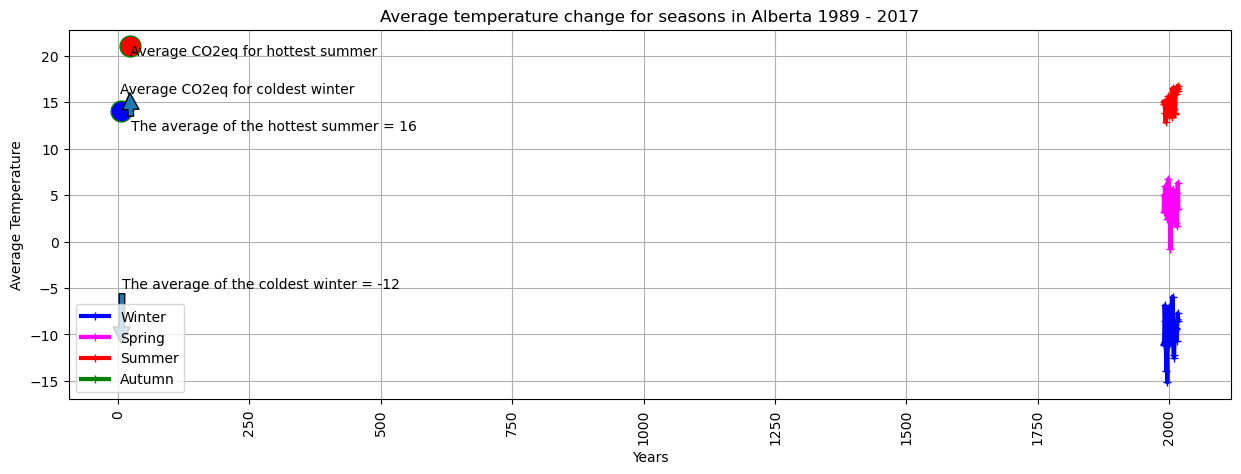

In [27]:
# AB line grapgh
x_AB_w = [7]
y_AB_w = [14]
x_AB_s = [23]
y_AB_s = [21]
plt.figure().set_figwidth(15)
plt.annotate('The average of the coldest winter = -12', xy=(7,-11), xytext=(8,-5), arrowprops={})
plt.annotate('The average of the hottest summer = 16', xy=(23,16), xytext=(25,12), arrowprops={})
AB_winter = plt.plot(AB_winter_group["Year"], AB_winter_group["Average Temperature_mean"], marker="+", color="blue", linewidth=3, label="Winter")
AB_spring = plt.plot(AB_spring_group["Year"], AB_spring_group["Average Temperature_mean"], marker="+", color="magenta", linewidth=3, label="Spring")
AB_summer = plt.plot(AB_summer_group["Year"], AB_summer_group["Average Temperature_mean"], marker="+", color="red", linewidth=3, label="Summer")
AB_autumn = plt.plot(AB_autumn_group["Year"], AB_autumn_group["Average Temperature_mean"], marker="+", color="green", linewidth=3, label="Autumn")
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Alberta 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.grid()
plt.plot(x_AB_w, y_AB_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_AB_s, y_AB_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")
plt.text(5, 16, 'Average CO2eq for coldest winter')
plt.text(24, 20, 'Average CO2eq for hottest summer')
plt.show()

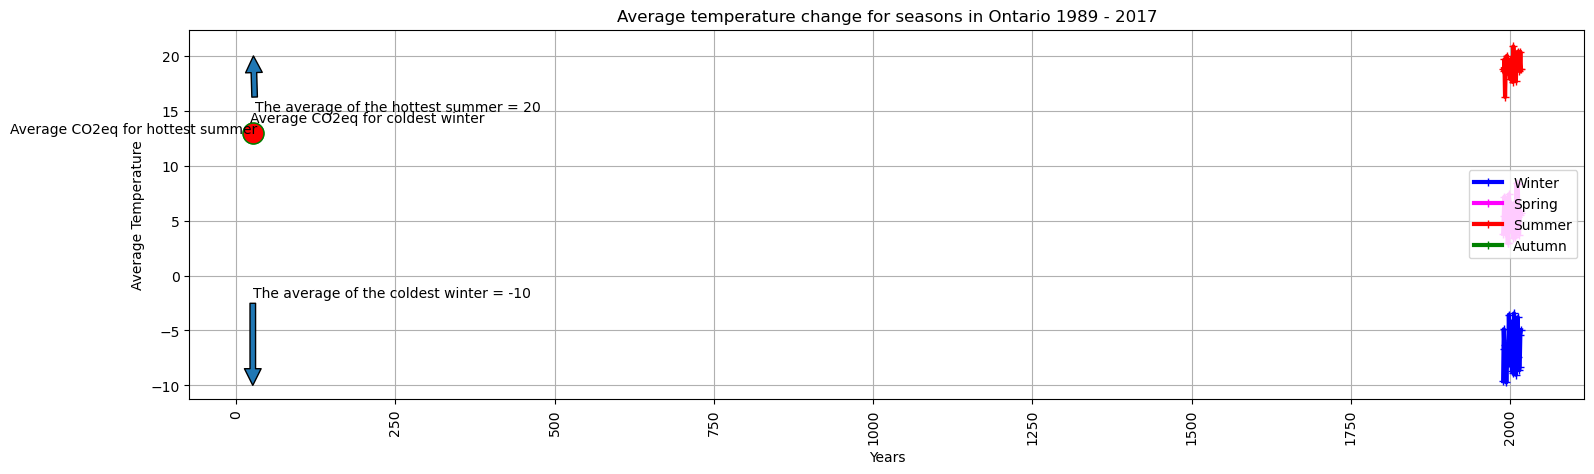

In [28]:
#locate the seasons for ON
ON_autumn_group = Prov_ON.loc[Prov_ON["Seasons"] == "Autumn"]
ON_spring_group = Prov_ON.loc[Prov_ON["Seasons"] == "Spring"]
ON_winter_group = Prov_ON.loc[Prov_ON["Seasons"] == "Winter"]
ON_summer_group = Prov_ON.loc[Prov_ON["Seasons"] == "Summer"]

#ON line grapgh
x_ON_w = [26]
y_ON_w = [13]
x_ON_s = [27]
y_ON_s = [13]
plt.figure().set_figwidth(18)
plt.annotate('The average of the coldest winter = -10',xy=(26,-10),xytext=(26,-2),arrowprops={})
plt.annotate('The average of the hottest summer = 20',xy=(27,20),xytext=(29,15),arrowprops={})
ON_winter = plt.plot(ON_winter_group["Year"],ON_winter_group ["Average Temperature_mean"] , marker="+",color="blue", linewidth=3, label = "Winter" )
ON_spring = plt.plot(ON_spring_group["Year"],ON_spring_group ["Average Temperature_mean"] , marker="+",color="magenta", linewidth=3, label = "Spring")
ON_summer = plt.plot(ON_summer_group["Year"],ON_summer_group ["Average Temperature_mean"] , marker="+",color="red", linewidth=3, label = "Summer")
ON_autumn = plt.plot(ON_autumn_group["Year"],ON_autumn_group ["Average Temperature_mean"] , marker="+",color="green", linewidth=3, label = "Autumn")
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Ontario 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc = "right")
plt.grid()
plt.plot(x_ON_w, y_ON_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_ON_s, y_ON_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")
plt.text(21,14,'Average CO2eq for coldest winter')
plt.text(33,13,'Average CO2eq for hottest summer',horizontalalignment='right')
plt.show()

In [29]:
QC_winter_group = Prov_QC.loc[Prov_QC["Seasons"] == "Winter"]
Coldest_winter_QC = QC_winter_group['Average Temperature_mean'].min()
Coldest_winter_QC

-14.225797101449276

In [30]:
QC_summer_group = Prov_QC.loc[Prov_QC["Seasons"] == "Summer"]
Hottest_summer_QC = QC_summer_group['Average Temperature_mean'].max()
Hottest_summer_QC

19.22659090909091

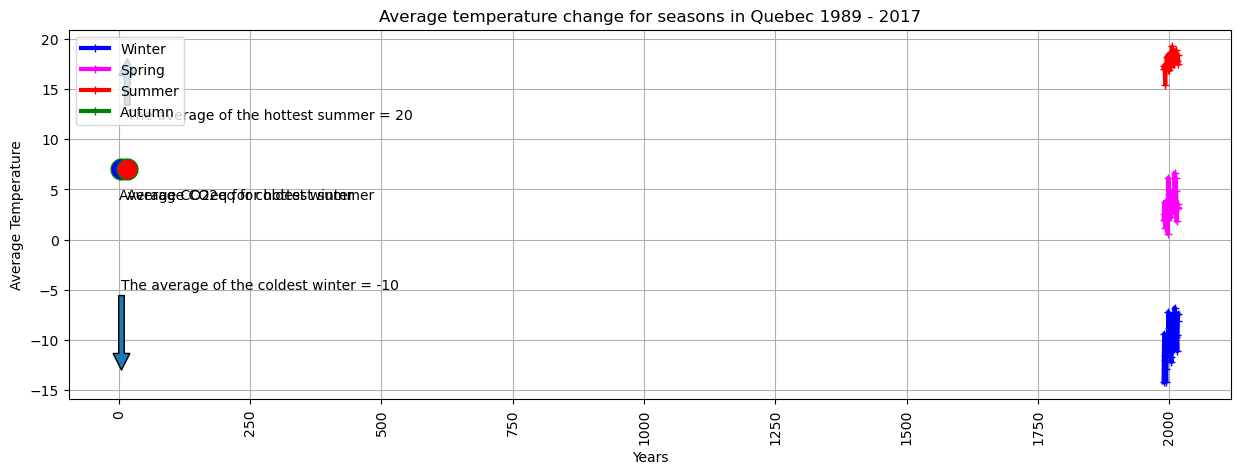

In [31]:
#locate the seasons for QC
QC_autumn_group = Prov_QC.loc[Prov_QC["Seasons"] == "Autumn"]
QC_spring_group = Prov_QC.loc[Prov_QC["Seasons"] == "Spring"]
QC_winter_group = Prov_QC.loc[Prov_QC["Seasons"] == "Winter"]
QC_summer_group = Prov_QC.loc[Prov_QC["Seasons"] == "Summer"]


#QC line graph
x_QC_w = [5]
y_QC_w = [7]
x_QC_s = [16]
y_QC_s = [7]

plt.figure().set_figwidth(15)

plt.annotate('The average of the coldest winter = -10', xy=(5,-13), xytext=(5,-5), arrowprops={})
plt.annotate('The average of the hottest summer = 20', xy=(16,18), xytext=(16,12), arrowprops={})

QC_winter = plt.plot(QC_winter_group["Year"], QC_winter_group["Average Temperature_mean"], marker="+", color="blue", linewidth=3, label="Winter")
QC_spring = plt.plot(QC_spring_group["Year"], QC_spring_group["Average Temperature_mean"], marker="+", color="magenta", linewidth=3, label="Spring")
QC_summer = plt.plot(QC_summer_group["Year"], QC_summer_group["Average Temperature_mean"], marker="+", color="red", linewidth=3, label="Summer")
QC_autumn = plt.plot(QC_autumn_group["Year"], QC_autumn_group["Average Temperature_mean"], marker="+", color="green", linewidth=3, label="Autumn")

plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Quebec 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.grid()

plt.plot(x_QC_w, y_QC_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_QC_s, y_QC_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")

plt.text(1, 4, 'Average CO2eq for coldest winter')
plt.text(16, 4, 'Average CO2eq for hottest summer')

plt.show()


In [34]:
un_df = Gas_DF["CO2eq"].unique()
un_df

array(['61.96', '7.87', '102.65', '1.54', '1.22', '1.07', '0.39', '0.72',
       '10.25', '0', '3.91', '13.72', '62.83', '7.28', '102.18', '1.67',
       '1.16', '1.04', '0.31', '0.79', '9.62', '3.39', '14.09', '67.58',
       '6.56', '110.82', '1.92', '1.25', '0.88', '0.21', '0.75', '11.08',
       '3.42', '17.04', '0.12', '71.06', '6.28', '117.53', '1.98', '1.45',
       '1.06', '0.24', '0.9', '11.49', '3.64', '19.35', '0.08', '72.57',
       '8.49', '121.51', '1.94', '1.49', '0.47', '0.22', '0.59', '4.02',
       '20.58', '0.07', '74.57', '10.2', '127.6', '2.03', '1.3', '0.97',
       '0.68', '11.56', '3.81', '22.13', '78.3', '11.35', '135.36',
       '2.06', '1.5', '1.14', '0.71', '13.07', '22.91', '0.09', '78.75',
       '9.96', '136.5', '1.29', '0.15', '0.63', '12.92', '3.73', '25.44',
       '0.11', '80.31', '11.01', '140.86', '1.74', '1.33', '3.19', '0.14',
       '0.61', '13.16', '3.84', '25.41', '88.28', '12.05', '149.94',
       '1.82', '1.44', '2.63', '12.94', '3.71', '26.1

In [67]:
Gas_Gas_df = Gas_df.groupby("Region")
Gas_Gas_df.head()

,index,Year,Region,Source,CO2eq,Unit
0,1,1990,Alberta,Oil and Gas,61.96,Mt
1,11,1990,British Columbia,Oil and Gas,7.87,Mt
2,21,1990,Canada,Oil and Gas,102.65,Mt
3,31,1990,Manitoba,Oil and Gas,1.54,Mt
4,40,1990,New Brunswick,Oil and Gas,1.22,Mt
...,...,...,...,...,...,...
123,1165,1999,Northwest Territories,Oil and Gas,0.15,Mt
136,1295,2000,Northwest Territories,Oil and Gas,0.38,Mt
149,1425,2001,Northwest Territories,Oil and Gas,0.50,Mt
162,1555,2002,Northwest Territories,Oil and Gas,0.47,Mt


In [39]:
Gas_df['CO2eq'] = pd.to_numeric(Gas_df['CO2eq'], errors='coerce')
print(Gas_df.dtypes)

index       int64
Year        int64
Region     object
Source     object
CO2eq     float64
Unit       object
dtype: object


C:\Users\Fabio_UofT SCS\AppData\Local\Temp\ipykernel_2208\2884139434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gas_df['CO2eq'] = pd.to_numeric(Gas_df['CO2eq'], errors='coerce')


In [40]:
Gas_av_df = Gas_df["CO2eq"].mean()
Gas_av_df

25.263846153846178

In [41]:
#coldest winter AB = -12 in 1996 \n",
#hottest summer AB  = 16 in  2012\n",

#coldest winter ON = -10 in 2015 \n",
#hottest summer ON  = 20 in 2016 \n",

#coldest winter QC = -10 in 1994\n",
#hottest summer QC  = 20 in 2005"


'#hottest summer QC  = 20 in 2005'

In [43]:
#locate the years for both hottest summer and coldest winter for AB
Gas_1996_winter = Gas_df.loc[Gas_df['Year'] == 1996 ]
Gas_2012_summer = Gas_df.loc[Gas_df['Year'] == 2012 ]

#locate the years for both hottest summer and coldest winter for ON

Gas_2015_winter = Gas_df.loc[Gas_df['Year'] == 2015 ]
Gas_2016_summer = Gas_df.loc[Gas_df['Year'] == 2016 ]

#locate the years for both hottest summer and coldest winter for QC
Gas_1994_winter = Gas_df.loc[Gas_df['Year'] == 1994 ]
Gas_2005_summer = Gas_df.loc[Gas_df['Year'] == 2005 ]



In [45]:
#locate gas value for AB for both summer and winter
Gas_1996_AB_w = Gas_1996_winter.loc[Gas_1996_winter['Region'] == "Alberta" ]
Gas_2012_AB_s = Gas_2012_summer.loc[Gas_2012_summer['Region'] == "Alberta" ]

#locate gas value for ON for both summer and winter

Gas_2015_ON_w = Gas_2015_winter.loc[Gas_2015_winter ['Region'] == "Ontario" ]
Gas_2016_ON_s = Gas_2016_summer.loc[Gas_2016_summer['Region'] == "Ontario" ]

#locate gas value for QC for both summer and winter

Gas_1994_QC_w = Gas_1994_winter.loc[Gas_1994_winter['Region'] == "Quebec" ]
Gas_2005_QC_s = Gas_2005_summer.loc[Gas_2005_summer['Region'] == "Quebec" ]

In [49]:
#Getting the average gas for both coldest winter AB = -12 in 1996 and hottest summer AB  = 16 in  2012
Gas_AB_average_1996_w = Gas_1996_AB_w["CO2eq"].mean()
Gas_AB_average_1996_w

Gas_AB_average_2012_s = Gas_2012_AB_s["CO2eq"].mean()
Gas_AB_average_2012_s

133.63

In [50]:
#Getting the average of both coldest winter ON = -10 in 2015 and hottest summer ON  = 20 in 2016 
Gas_ON_average_2015_w = Gas_2015_ON_w["CO2eq"].mean()
Gas_ON_average_2015_w
Gas_ON_average_2016_s = Gas_2016_ON_s["CO2eq"].mean()
Gas_ON_average_2016_s

9.18

In [51]:
#Getting the average of both coldest winter QC = -10 in 1994 and hottest summer QC  = 20 in 2005
Gas_QC_average_1994_w = Gas_1994_QC_w["CO2eq"].mean()
Gas_QC_average_1994_w


Gas_QC_average_2005_s = Gas_2005_QC_s ["CO2eq"].mean()
Gas_QC_average_2005_s

4.37

In [56]:
Gas_2011 = Gas_df.loc[Gas_df['Year'] == 2011 ]
Gas_2011

,index,Year,Region,Source,CO2eq,Unit
273,2658,2011,Alberta,Oil and Gas,126.83,Mt
274,2668,2011,British Columbia,Oil and Gas,14.76,Mt
275,2678,2011,Canada,Oil and Gas,187.21,Mt
276,2688,2011,Manitoba,Oil and Gas,0.80,Mt
277,2697,2011,New Brunswick,Oil and Gas,3.64,Mt
278,2706,2011,Newfoundland and Labrador,Oil and Gas,2.36,Mt
279,2715,2011,Northwest Territories,Oil and Gas,0.09,Mt
280,2723,2011,Nova Scotia,Oil and Gas,1.54,Mt
281,2740,2011,Ontario,Oil and Gas,9.00,Mt
282,2749,2011,Prince Edward Island,Oil and Gas,0.00,Mt


In [57]:
Gas_2011_ON = Gas_2011.loc[Gas_2011['Region'] == "Ontario" ]
Gas_2011_ON.head()

,index,Year,Region,Source,CO2eq,Unit
281,2740,2011,Ontario,Oil and Gas,9.0,Mt


In [59]:
Gas_2004_AB = Gas_2011.loc[Gas_2011['Region'] == "Alberta" ]
Gas_2004_AB

,index,Year,Region,Source,CO2eq,Unit
273,2658,2011,Alberta,Oil and Gas,126.83,Mt


In [60]:
 #calculate the maximum and the minimum amount of gas for AB in the year of 2004.
max_gas_AB_2004 = Gas_2004_AB["CO2eq"].max()
    
min_gas_AB_2004 = Gas_2004_AB["CO2eq"].min()
max_gas_AB_2004


gas_AB_max = Gas_2004_AB.loc[Gas_2004_AB['CO2eq'] == max_gas_AB_2004]
gas_AB_max

gas_AB_min = Gas_2004_AB.loc[Gas_2004_AB['CO2eq'] == min_gas_AB_2004]
gas_AB_min




,index,Year,Region,Source,CO2eq,Unit
273,2658,2011,Alberta,Oil and Gas,126.83,Mt


In [61]:
num_un = Gas_2011_ON["Source"].unique()
num_un

array(['Oil and Gas'], dtype=object)

In [62]:
#average gas for 2011 in ON
Gas_ON_average_2011 = Gas_2011_ON["CO2eq"].mean()
Gas_ON_average_2011

9.0

In [63]:
#calculate the maximum and the minimum amount of gas for AB in the year of 2004.
max_gas_ON_2011 = Gas_2011_ON["CO2eq"].max()
min_gas_ON_2011 = Gas_2011_ON["CO2eq"].min()
max_gas_ON_2011

9.0

In [64]:
gas_ON_max = Gas_2011_ON.loc[Gas_2011_ON['CO2eq'] == max_gas_ON_2011]
gas_ON_max

,index,Year,Region,Source,CO2eq,Unit
281,2740,2011,Ontario,Oil and Gas,9.0,Mt


In [65]:
gas_ON_min = Gas_2011_ON.loc[Gas_2011_ON['CO2eq'] == min_gas_ON_2011]
gas_ON_min

,index,Year,Region,Source,CO2eq,Unit
281,2740,2011,Ontario,Oil and Gas,9.0,Mt
